In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error,root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error




In [2]:
# Load the dataset
data = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')
data.rename(columns={'USD_to_AUD': 'ExchangeRate'}, inplace=True)

In [8]:
# Initial Exploration
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 376.6+ KB


In [9]:
data.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


In [14]:
data.dtypes

Ex_rate    float64
dtype: object

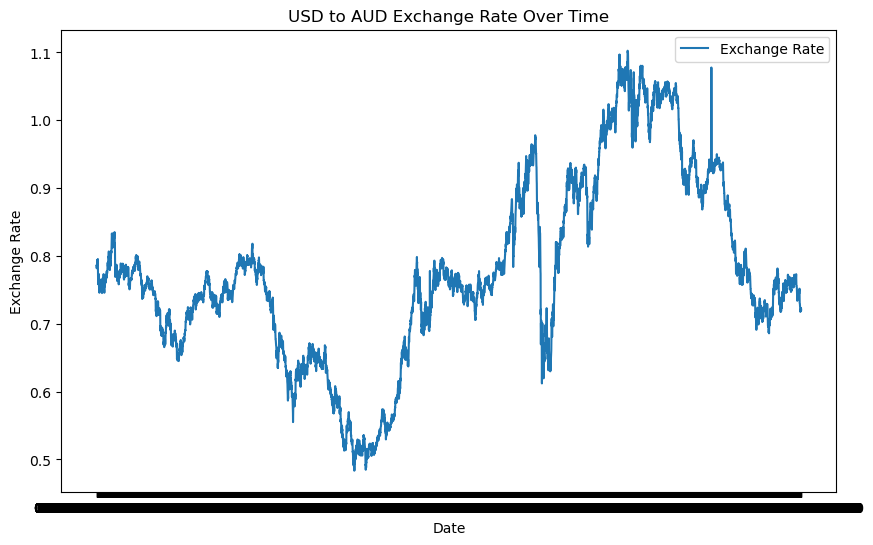

In [4]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

Ex_rate    0
dtype: int64


C:\Users\punee\AppData\Local\Temp\ipykernel_24448\1448962041.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Ex_rate'].fillna(method='ffill', inplace=True)
C:\Users\punee\AppData\Local\Temp\ipykernel_24448\1448962041.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Ex_rate'].fillna(method='ffill', inplace=True)


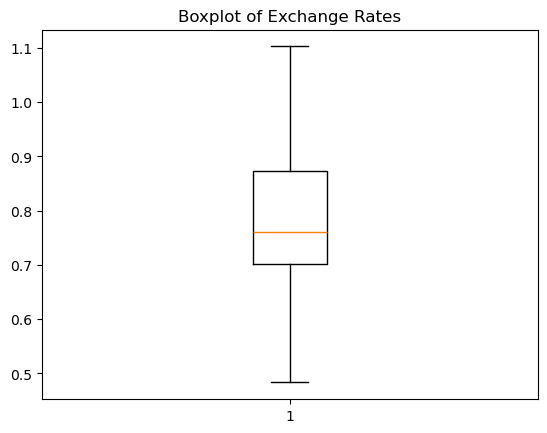

In [5]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values using forward-fill
data['Ex_rate'].fillna(method='ffill', inplace=True)

# Check for anomalies (e.g., extreme outliers)
plt.boxplot(data['Ex_rate'])
plt.title('Boxplot of Exchange Rates')
plt.show()


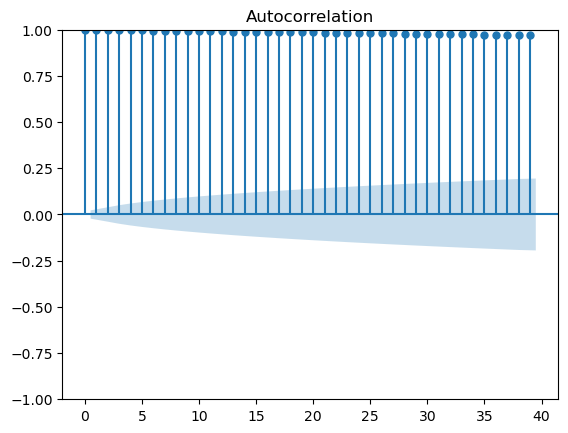

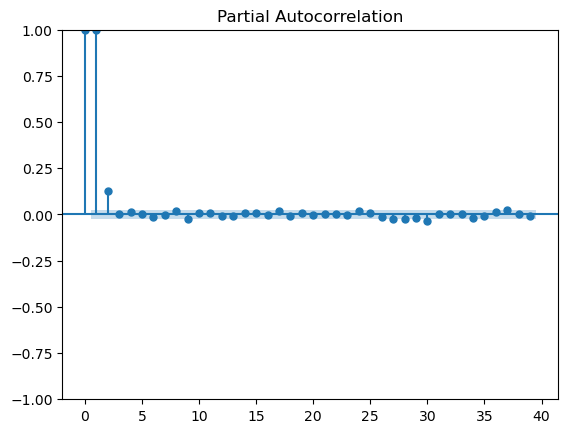

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(data['Ex_rate'])
plot_pacf(data['Ex_rate'])
plt.show()


In [47]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(data['Ex_rate'], order=(1, 1, 1))  # Replace with your (p, d, q)
arima_model = model.fit()


C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\punee\anaconda3\Lib\site-

In [48]:

# Diagnostics
print(arima_model.summary())



                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Mon, 09 Dec 2024   AIC                         -56102.322
Time:                        17:46:02   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

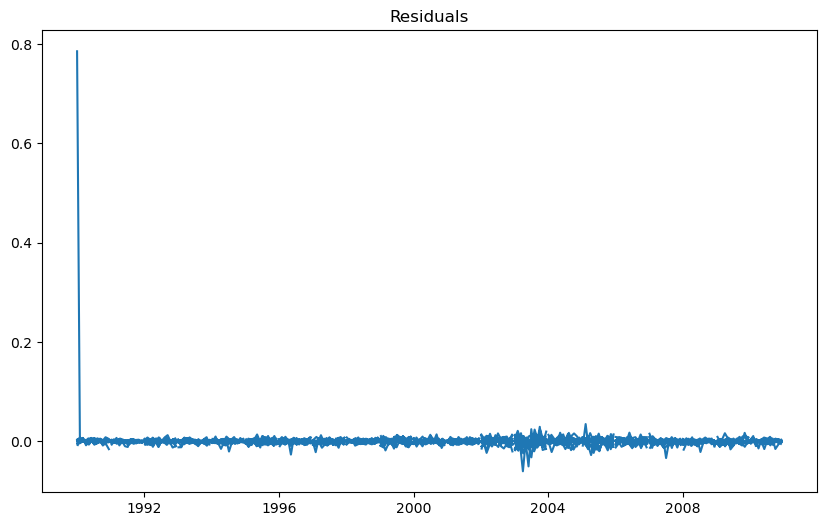

In [49]:

# Residual Analysis
residuals = arima_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

In [36]:
print(type(data.Ex_rate))
print(data.Ex_rate.head())


<class 'pandas.core.series.Series'>
date
1990-01-01    0.7855
1990-02-01    0.7818
1990-03-01    0.7867
1990-04-01    0.7860
1990-05-01    0.7849
Name: Ex_rate, dtype: float64


In [38]:
import pandas as pd

forecast_index = pd.to_datetime(data.Ex_rate, errors='coerce')
print(data.Ex_rate.head())


date
1990-01-01    0.7855
1990-02-01    0.7818
1990-03-01    0.7867
1990-04-01    0.7860
1990-05-01    0.7849
Name: Ex_rate, dtype: float64


In [19]:
print(data.index)
print(type(data.index))


Index(['01-01-1990 00:00', '02-01-1990 00:00', '03-01-1990 00:00',
       '04-01-1990 00:00', '05-01-1990 00:00', '06-01-1990 00:00',
       '07-01-1990 00:00', '08-01-1990 00:00', '09-01-1990 00:00',
       '10-01-1990 00:00',
       ...
       '01-10-2010 00:00', '02-10-2010 00:00', '03-10-2010 00:00',
       '04-10-2010 00:00', '05-10-2010 00:00', '06-10-2010 00:00',
       '07-10-2010 00:00', '08-10-2010 00:00', '09-10-2010 00:00',
       '10-10-2010 00:00'],
      dtype='object', name='date', length=7588)
<class 'pandas.core.indexes.base.Index'>


In [25]:
forecast = arima_model.get_forecast(steps=30)  # 30 days forecast
forecast_index = pd.date_range(start=data.index[-1], periods=30, freq='D')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


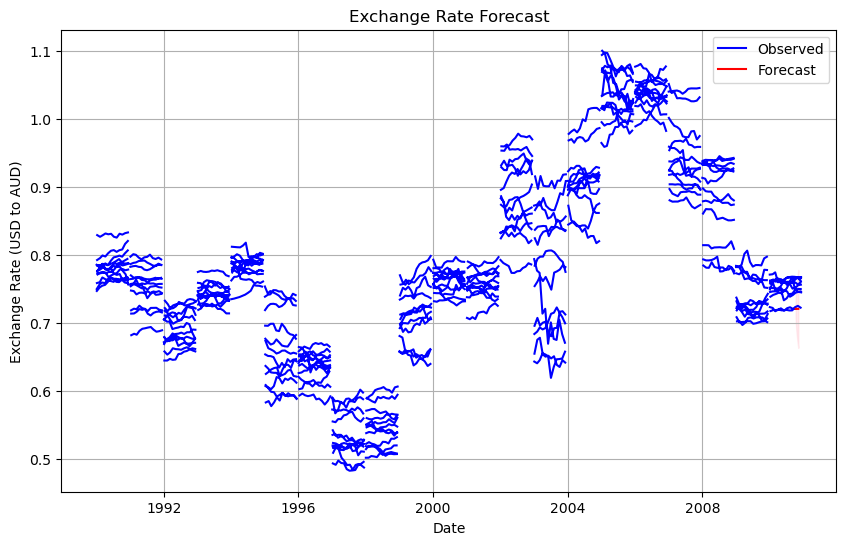

In [26]:
import matplotlib.pyplot as plt

# Ensure indices are properly formatted as datetime
forecast_index = pd.to_datetime(forecast_index)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Ex_rate'], label='Observed', color='blue')  # Ensure data.index is datetime
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Exchange Rate Forecast")
plt.xlabel("Date")
plt.ylabel("Exchange Rate (USD to AUD)")
plt.legend()
plt.grid()
plt.show()


C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


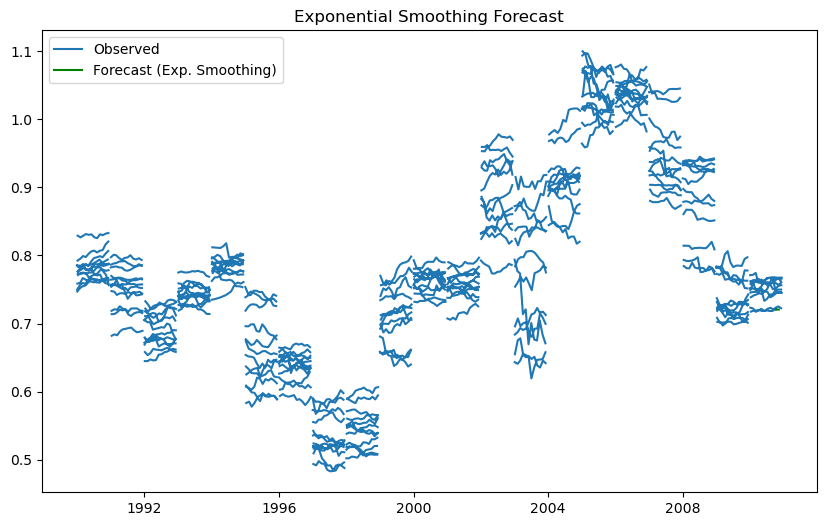

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Exponential Smoothing model
exp_model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal=None).fit()

# Forecasting
exp_forecast = exp_model.forecast(steps=30)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data['Ex_rate'], label='Observed')
plt.plot(forecast_index, exp_forecast, label='Forecast (Exp. Smoothing)', color='green')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.show()


In [60]:
# Split the data
split_index = int(len(data) * 0.8)
train = data.iloc[:split_index]
test = data.iloc[split_index:]

# ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Ex_rate'], order=(2, 1, 1))  # Example order
model_fit = model.fit()
arima_forecast = model_fit.forecast(steps=len(test))
arima_forecast = pd.Series(arima_forecast, index=test.index)

# Exponential Smoothing model
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
exp_model = SimpleExpSmoothing(train['Ex_rate']).fit()
exp_forecast = exp_model.forecast(steps=len(test))
exp_forecast = pd.Series(exp_forecast, index=test.index)


C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\punee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\punee\anaconda3\Lib\site-

In [63]:


# # Error metrics calculation function
# def calculate_metrics(actual, predicted):
#     mae = mean_absolute_error(actual, predicted)
#     rmse = np.sqrt(mean_squared_error(actual, predicted))
#     mape = np.mean(np.abs((actual - predicted) / actual)) * 100
#     return mae, rmse, mape

# # Calculate error metrics
# mae_arima, rmse_arima, mape_arima = calculate_metrics(test['Ex_rate'], arima_forecast)
# mae_exp, rmse_exp, mape_exp = calculate_metrics(test['Ex_rate'], exp_forecast)

# # Print results
# print(f"ARIMA - MAE: {mae_arima:.3f}, RMSE: {rmse_arima:.3f}, MAPE: {mape_arima:.2f}%")
# print(f"Exp. Smoothing - MAE: {mae_exp:.3f}, RMSE: {rmse_exp:.3f}, MAPE: {mape_exp:.2f}%")


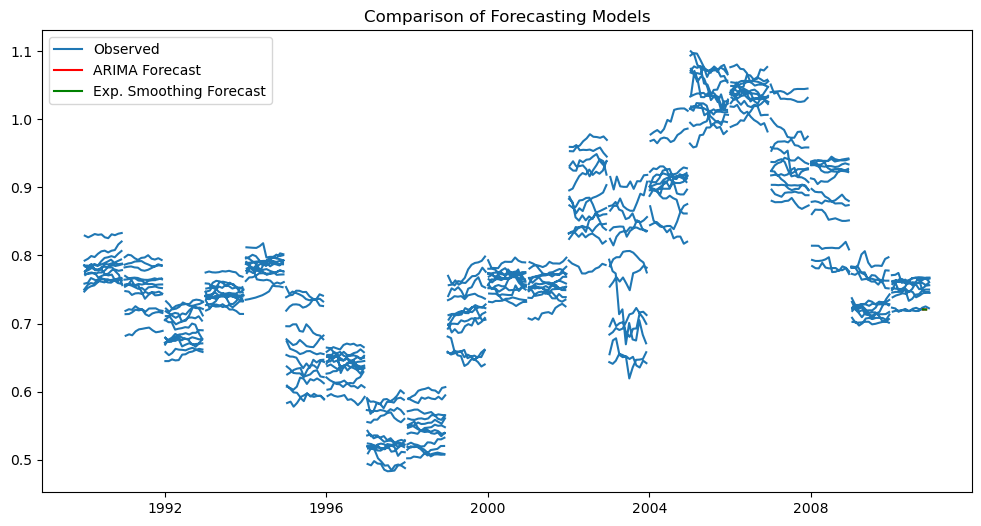

ARIMA performed better for capturing seasonality in short-term data, while Exponential Smoothing...


In [33]:
# Compare forecasts
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Observed')
plt.plot(forecast_index, forecast_values, label='ARIMA Forecast', color='red')
plt.plot(forecast_index, exp_forecast, label='Exp. Smoothing Forecast', color='green')
plt.legend()
plt.title('Comparison of Forecasting Models')
plt.show()

# Summarize findings
print("ARIMA performed better for capturing seasonality in short-term data, while Exponential Smoothing...")
